In [1]:
import numpy as np
import openfermion
from openfermion.chem import MolecularData
from openfermionqchem import run_qchem
import qeom

In [2]:
def print_result(bond,energy):   
    string1,string2 = "Total Energy\n","Excitation Energy\n"
    
    for i in range(len(bond)):
        string1 += "{:4.2f}".format(bond[i])
        string2 += "{:4.2f}".format(bond[i])

        for j in range(len(energy[i])):
            string1 += "{:15.10f}".format(energy[i][j])
        string1 += '\n'

        for j in range(1,len(energy[i])):
            string2 += "{:15.10f}".format((energy[i][j] - energy[i][0]) * 27.211324570273)
        string2 += '\n'
        
    print(string1+'\n'+string2)

## H2/6-31G

In [3]:
# Set molecule parameters.
# We do not run calculations through OpenFermion directly.
basis        = 'sto-3g'
multiplicity = 1

# Generate molecule at different bond lengths.
bond_length_interval = 0.1
n_points = 19
singlet  = []
triplet  = []
bond_lengths = []

for point in range(n_points):
    bond_length    = 0.2 + point * bond_length_interval
    geometry       = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule       = MolecularData(geometry, basis, multiplicity)  
    directory      = "/Users/yongbinkim/Desktop/venv/publish/qeom-davidson/OpenFermion-QChem/examples/"
    system         = 'H2/eom-ccsd/6-31g/'+str(round(bond_length,2))+'/'
    molecule       = run_qchem(molecule,file_directory=directory+system,output_name='test_qis')
    
    print("r = {:4.2f}".format(bond_length))
    bond_lengths.append(bond_length)

    # ground state
    gs = qeom.Adapt_VQE(molecule)
    gs.run()
    
    qeom_davidson = qeom.DavidsonVar(gs=gs)
    
    # singlet
    qeom_davidson.run(nroot=2,spin='singlet')
    singlet.append(qeom_davidson.energy)

    # triplet
    qeom_davidson.run(nroot=3,spin='triplet')
    triplet.append(qeom_davidson.energy)
    
singlet      = np.array(singlet)
triplet      = np.array(triplet)
bond_lengths = np.array(bond_lengths)

r = 0.20
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *
*     https://doi.org/10.1038/s41467-019-10988-2    *
*       https://github.com/asthanaa/adapt-vqe       *
*****************************************************
 ------------------------------------------------
      Iter   Energy (a.u.)  Gnorm      <S^2>     
 ------------------------------------------------
      1     0.07284297     0.322      0.00
      2     0.06750959     0.195      0.00
      3     0.06574922     0.125      0.00
      4     0.06521597     0.048      0.00
      5     0.06516888     0.014      0.00
      6     0.06516888*    0.000      0.00
 ------------------------------------------------
 SCF energy                   = 0.07807279
 ADAPT-VQE correlation energy = -0.01290391
 ADAPT-VQE energy             = 0.06516888

 ADAPT-VQE calculation: 

      3     1     6       0.0405       0.0124963975           18.3134003080
      4     1     8       0.0000       0.0119060066           18.2973349884
 Initial guess vectors
 |b2> =  + 0.70711|01001000> + 0.70711|10000100>
      1     2     2       0.0492       0.1661793487           22.4953169739
      2     2     4       0.0000       0.1652018305           22.4687174084
 Initial guess vectors
 |b3> =  + 0.70711|00011000> + 0.70711|00100100>
      1     3     2       0.2076       1.1902560506           50.3618004916
      2     3     4       0.1412       1.2124929138           50.9668949957
      3     3     6       0.0262       1.2007902814           50.6484508655
      4     3     8       0.0000       1.1995965020           50.6159665478
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1    0.011906 

      3     2     4       0.0639      -0.0508849976           27.9454561861
      4     2     5       0.0274      -0.0545833518           27.8448190691
      5     2     7       0.0000      -0.0550978306           27.8308194216
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -0.431341   17.592747   0.00  + 0.12649|00011000> - 0.12649|00100100> - 0.69559|01100000> + 0.69559|10010000>
     2   -0.055098   27.830819   0.00  - 0.12869|00001100> - 0.69774|01001000> + 0.69774|10000100>

 qEOM-Davidson calculation: 4.79 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -----------------------------------------------------------------------

      1     -1.13255249     0.318      0.00
      2     -1.13866520     0.243      0.00
      3     -1.14439639     0.193      0.00
      4     -1.15011234     0.118      0.00
      5     -1.15015684     0.014      0.00
      6     -1.15015684*    0.000      0.00
 ------------------------------------------------
 SCF energy                   = -1.12612316
 ADAPT-VQE correlation energy = -0.02403368
 ADAPT-VQE energy             = -1.15015684

 ADAPT-VQE calculation: 16.73 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|0

      2     2     4       0.0000      -0.2711631556           23.9150733372
 Initial guess vectors
 |b3> =  + 0.70711|01000010> + 0.70711|10000001>
      1     3     2       0.1656       0.1451482203           35.2434573085
      2     3     4       0.0890       0.1670761111           35.8401442634
      3     3     6       0.0132       0.1588068470           35.6151266338
      4     3     8       0.0000       0.1576054050           35.5824338059
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -0.789080    9.821878   2.00  - 0.10667|01000010> + 0.69687|01100000> - 0.10667|10000001> + 0.69687|10010000>
     2   -0.271163   23.915073   2.00  + 0.70546|01001000> + 0.70546|10000100>
     3    0.157605   35.582434   2.00  + 0.69197|01000010> + 0.10962|01100000> + 0.69197|10000001> + 0.10962|10010000>

 

      3     2     4       0.0532      -0.3001175133           22.4945363329
      4     2     5       0.0337      -0.3015107003           22.4566258698
      5     2     7       0.0000      -0.3056241588           22.3446932162
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -0.638465   13.287659   0.00  - 0.70462|01100000> + 0.70462|10010000>
     2   -0.305624   22.344693   0.00  + 0.13562|00010010> - 0.13562|00100001> + 0.97284|00110000>

 qEOM-Davidson calculation: 8.46 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  

      1     -1.07896018     0.294      0.00
      2     -1.09052993     0.245      0.00
      3     -1.09315957     0.154      0.00
      4     -1.09474966     0.105      0.00
      5     -1.09559549     0.063      0.00
      6     -1.09559549*    0.000      0.00
 ------------------------------------------------
 SCF energy                   = -1.05575928
 ADAPT-VQE correlation energy = -0.03983621
 ADAPT-VQE energy             = -1.09559549

 ADAPT-VQE calculation: 15.20 s

*****************************************************
*           Start qEOM-DAVIDSON algorithm           *
*          Yongbin Kim and Anna I. Krylov           *
*****************************************************
 -------------------------------------------------------------------------------------
      Iter  Root  NVecs  ResNorm     Total energy (a.u.)    Excitation energy (eV.)   
 -------------------------------------------------------------------------------------
 Initial guess vectors
 |b1> =  - 0.70711|0

      3     3     6       0.0821      -0.0216407549           28.8158716683
      4     3     8       0.0000      -0.0284494805           28.6305972249
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -0.932917    4.018825   2.00  + 0.69964|01100000> + 0.69964|10010000>
     2   -0.049271   28.064006   2.00  + 0.18702|00010010> + 0.18702|00100001> + 0.68193|01001000> + 0.68193|10000100>
     3   -0.028449   28.630597   2.00  + 0.16132|00011000> + 0.16132|00100100> + 0.67833|01000010> - 0.10202|01100000> + 0.67833|10000001> - 0.10202|10010000>

 qEOM-Davidson calculation: 4.06 s

r = 1.40
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *


      2     1     4       0.0437      -0.9562993121            2.6680195241
      3     1     6       0.0042      -0.9578966572            2.6245536475
      4     1     8       0.0000      -0.9579056339            2.6243093801
 Initial guess vectors
 |b2> =  + 0.70711|01001000> + 0.70711|10000100>
      1     2     2       0.1487      -0.0140228094           28.3086112724
      2     2     4       0.0896       0.0001115827           28.6932268025
      3     2     6       0.0741      -0.0224996873           28.0779441972
      4     2     8       0.0000      -0.0280328810           27.9273786680
 Initial guess vectors
 |b3> =  + 0.70711|01000010> + 0.70711|10000001>
      1     3     2       0.0884       0.0223468388           29.2982775743
      2     3     4       0.0000      -0.0145034077           28.2955335563
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -----------------------------

      2     1     4       0.1146      -0.6575383541           10.2452375831
      3     1     6       0.0096      -0.6693313590            9.9243342993
      4     1     8       0.0000      -0.6694518053            9.9210567969
 Initial guess vectors
 |b2> =  + 1.00000|00110000>
      1     2     1       0.1724      -0.5649062135           12.7658808285
      2     2     2       0.1318      -0.5698748167           12.6306785531
      3     2     4       0.1029      -0.5830458821           12.2722764186
      4     2     6       0.0651      -0.5918908838           12.0315922068
      5     2     7       0.0000      -0.5942898068           11.9663143342
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -0.669452    9.921057   0.00  - 0.70169|01100000> + 0.70169|10010000>
     2   -0.594290   11.966314  

*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *
*     https://doi.org/10.1038/s41467-019-10988-2    *
*       https://github.com/asthanaa/adapt-vqe       *
*****************************************************
 ------------------------------------------------
      Iter   Energy (a.u.)  Gnorm      <S^2>     
 ------------------------------------------------
      1     -1.00646024     0.297      0.00
      2     -1.01472636     0.198      0.00
      3     -1.01892458     0.140      0.00
      4     -1.01943899     0.057      0.00
      5     -1.01960353     0.027      0.00
      6     -1.01960353*    0.000      0.00
 ------------------------------------------------
 SCF energy                   = -0.93070722
 ADAPT-VQE correlation energy = -0.08889630
 ADAPT-VQE energy             = -1.01960353

 ADAPT-VQE calculation: 1

      2     1     4       0.0262      -0.9857111827            0.7782190150
      3     1     6       0.0056      -0.9863138400            0.7618199101
      4     1     8       0.0000      -0.9863298337            0.7613847005
 Initial guess vectors
 |b2> =  + 0.70711|01001000> + 0.70711|10000100>
      1     2     2       0.1074       0.0306177764           28.4338761913
      2     2     4       0.0000      -0.0243388709           26.9384330244
 Initial guess vectors
 |b3> =  + 0.70711|01000010> + 0.70711|10000001>
      1     3     2       0.1482       0.0723476708           29.5694018898
      2     3     4       0.1162       0.0016301666           27.6450849314
      3     3     6       0.0760      -0.0031896116           27.5139323825
      4     3     8       0.0000      -0.0052852672           27.4569068175
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -----------------------------

In [4]:
print("singlet")
print_result(bond_lengths,singlet)

singlet
Total Energy
0.20   0.0651688811   0.8551221574   1.0891856096
0.30  -0.6605101759   0.0774026998   0.3600195586
0.40  -0.9506786523  -0.2612214324   0.0691425189
0.50  -1.0778638980  -0.4313409078  -0.0550978306
0.60  -1.1319534575  -0.5231356836  -0.1017373530
0.70  -1.1501568433  -0.5749662756  -0.1083757563
0.80  -1.1500278825  -0.6056247478  -0.1147563661
0.90  -1.1406024516  -0.6250358405  -0.2196338476
1.00  -1.1267783499  -0.6384647982  -0.3056241588
1.10  -1.1112698803  -0.6485146426  -0.3763713623
1.20  -1.0955954918  -0.6563079074  -0.4345111824
1.30  -1.0806069068  -0.6622400337  -0.4820476373
1.40  -1.0667752785  -0.6664308304  -0.5205730716
1.50  -1.0543474433  -0.6689521455  -0.5514016995
1.60  -1.0434318158  -0.6699081517  -0.5756509472
1.70  -1.0340447442  -0.6694518053  -0.5942898068
1.80  -1.0261357143  -0.6677613986  -0.6081702465
1.90  -1.0196035253  -0.6650243966  -0.6180468191
2.00  -1.0143102688  -0.6614251531  -0.6245897821

Excitation Energy
0.20  21.4

In [5]:
print("triplet")
print_result(bond_lengths,triplet)

triplet
Total Energy
0.20   0.0651688811   0.8030237836   0.9101297241   2.0526324126
0.30  -0.6605101759   0.0119060066   0.1652018305   1.1995965020
0.40  -0.9506786523  -0.3444723414  -0.1357267478   0.7908583823
0.50  -1.0778638980  -0.5364840747  -0.2628943336   0.5621973524
0.60  -1.1319534575  -0.6534748522  -0.3054085751   0.4261074733
0.70  -1.1501568433  -0.7321050672  -0.3015535294   0.2738996451
0.80  -1.1500278825  -0.7890797136  -0.2711631556   0.1576054050
0.90  -1.1406024516  -0.8325085622  -0.2263636502   0.0808020983
1.00  -1.1267783499  -0.8665999703  -0.1757735882   0.0307862077
1.10  -1.1112698803  -0.8937516863  -0.1261519980  -0.0007845543
1.20  -1.0955954918  -0.9154967818  -0.0828030346  -0.0193353281
1.30  -1.0806069068  -0.9329174709  -0.0492713792  -0.0284494805
1.40  -1.0667752785  -0.9468360970  -0.0306655389  -0.0268418812
1.50  -1.0543474433  -0.9579056339  -0.0280328810  -0.0145034077
1.60  -1.0434318158  -0.9666602271  -0.0224461877  -0.0098151853
1.70

In [6]:
fci_energies = np.array([[0.0651688810, 0.8030234409, 0.8551218472, 0.9101296015, 1.0891847993, 2.0434667158],
                        [-0.6605101759, 0.0119056324, 0.0774023429, 0.1652016727, 0.3600191380, 1.1490607985],
                        [-0.9506786523,-0.3444728748,-0.2612218792,-0.1357272741, 0.0691421836, 0.6844123667],
                        [-1.0778638981,-0.5364843027,-0.4313412608,-0.2628944466,-0.0550981841, 0.3885683018],
                        [-1.1319534575,-0.6534749528,-0.5231360425,-0.3054086983,-0.1017376457, 0.1767450058],
                        [-1.1501568433,-0.7321053573,-0.5749666170,-0.3015536406,-0.1083760363, 0.0144206074],
                        [-1.1500278825,-0.7890798215,-0.6056250122,-0.2711633197,-0.1147564620,-0.0937890272],
                        [-1.1406024516,-0.8325088381,-0.6250360962,-0.2263639069,-0.2196340581,-0.0688732917],
                        [-1.1267783499,-0.8666000824,-0.6384649173,-0.1757736371,-0.3056243940,-0.0409334095],
                        [-1.1112698803,-0.8937520354,-0.6485150571,-0.1261520221,-0.3763716868,-0.0152712215],
                        [-1.0955954918,-0.9154969824,-0.6563081938,-0.0828030554,-0.4345114115,-0.0193350960],
                        [-1.0806069068,-0.9329178085,-0.6622400671,-0.0492714028,-0.4820479308,-0.0284492645],
                        [-1.0667752785,-0.9468362863,-0.6664310392,-0.0306656664,-0.5205733386,-0.0268418975],
                        [-1.0543474433,-0.9579057317,-0.6689522687,-0.0280327805,-0.5514019224,-0.0145034239],
                        [-1.0434318158,-0.9666604352,-0.6699092846,-0.0224460740,-0.5756511137,-0.0098151996],
                        [-1.0340447442,-0.9735432495,-0.6694526201,-0.0157855469,-0.5942900813,-0.0101769527],
                        [-1.0261357143,-0.9789220376,-0.6677615711,-0.0135687671,-0.6081704564,-0.0098522980],
                        [-1.0196035253,-0.9831010522,-0.6650247147,-0.0186060616,-0.6180468994,-0.0061025954],
                        [-1.0143102688,-0.9863299282,-0.6614254185,-0.0243389295,-0.6245901830,-0.0052856281]])

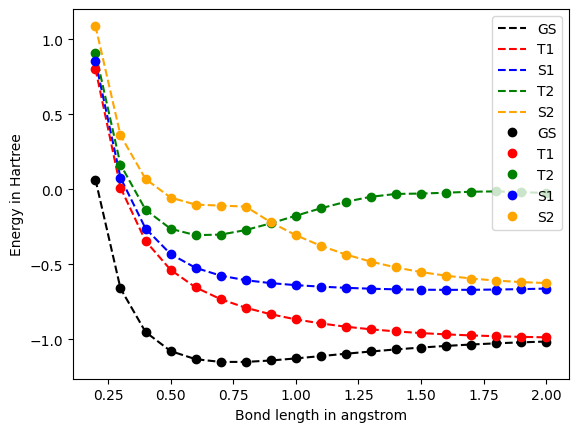

In [7]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies[:,0], '--', label='GS', color='black')
plt.plot(bond_lengths, fci_energies[:,1], '--', label='T1', color='red')
plt.plot(bond_lengths, fci_energies[:,2], '--', label='S1', color='blue')
plt.plot(bond_lengths, fci_energies[:,3], '--', label='T2', color='green')
plt.plot(bond_lengths, fci_energies[:,4], '--', label='S2', color='orange')
# plt.plot(bond_lengths, fci_energies[:,5], '--', label='T3', color='brown')

plt.plot(bond_lengths, triplet[:,0], 'o', label='GS', color='black')
plt.plot(bond_lengths, triplet[:,1], 'o', label='T1', color='red')
plt.plot(bond_lengths, triplet[:,2], 'o', label='T2', color='green')
# plt.plot(bond_lengths, triplet[:,3], 'o', label='T3', color='brown')
plt.plot(bond_lengths, singlet[:,1], 'o', label='S1', color='blue')
plt.plot(bond_lengths, singlet[:,2], 'o', label='S2', color='orange')

plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()

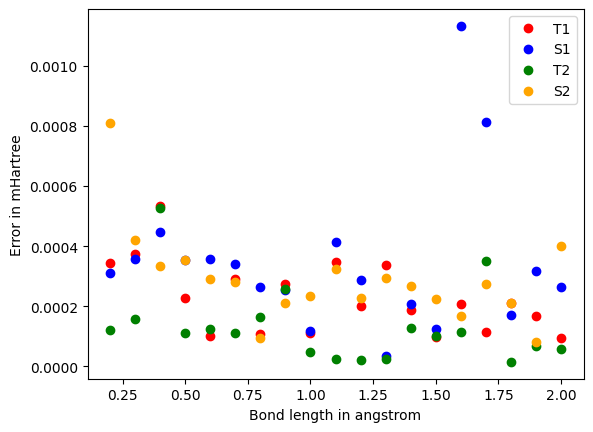

In [8]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, abs(fci_energies[:,1]-triplet[:,1])*1000, 'o', label='T1', color='red')
plt.plot(bond_lengths, abs(fci_energies[:,2]-singlet[:,1])*1000, 'o', label='S1', color='blue')
plt.plot(bond_lengths, abs(fci_energies[:,3]-triplet[:,2])*1000, 'o', label='T2', color='green')
plt.plot(bond_lengths, abs(fci_energies[:,4]-singlet[:,2])*1000, 'o', label='S2', color='orange')
# plt.plot(bond_lengths, abs(fci_energies[:,5]-triplet[:,3])*1000, 'o', label='T3', color='brown')

plt.ylabel('Error in mHartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()